In [74]:

# from google.colab import files
# uploaded = files.upload()

In [ ]:
# ========== P R O J E C T ======================================

# Project: CEP1 : Loan Lending Club
# Module : DL + Keras
# Date: Mar-2025
# By  : Soumen Dey
# Lic : GPL
# Dev Env Used : Google colab
# ---------------------------------------------------------------

In [111]:
# Download zip file to process with local file
!pip install py7zr

In [113]:
import requests
import py7zr

# Step 1: Download the .7z file from GitHub
def download_7z_file(github_url, local_filename):
    response = requests.get(github_url)
    if response.status_code == 200:
        with open(local_filename, "wb") as file:
            file.write(response.content)
        print(f"File downloaded successfully as {local_filename}")
    else:
        raise Exception(f"Failed to download file. HTTP Status Code: {response.status_code}")

# Step 2: Extract the contents of the .7z file
def extract_7z_file(file_path):
    with py7zr.SevenZipFile(file_path, mode='r') as archive:
        extracted_data = archive.readall()
    print("File extracted successfully.")
    return {name: data for name, data in extracted_data.items()}

# URL of the .7z file on GitHub
github_url = "https://raw.githubusercontent.com/Rimbik/assessments/refs/heads/main/DL_CEP/CEP1_LoanLending/ds/loan_data.7z"  # Update with the raw file URL

# Local filename to save the .7z file
local_filename = "loan_data.7z"

df = ''

try:
        # Download the .7z file
        download_7z_file(github_url, local_filename)

        # Extract the contents and assign to a variable
        extracted_files = extract_7z_file(local_filename)

        # Print the extracted file names
        print("Extracted files:", extracted_files.keys())

except Exception as e:
        print("An error occurred:", e)

# read the file to panda df
import pandas as pd
df = pd.read_csv(extracted_files['loan_data.csv'])
df.head()



File downloaded successfully as loan_data.7z
File extracted successfully.
Extracted files: dict_keys(['loan_data.csv'])


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [114]:
# STEP:2

# encode the non-numeric columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,2,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,0,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,4,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,2,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [115]:
# STEP:3

target = "not.fully.paid"
X = df.drop(target, axis=1)
y = df[target]

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

Print plots for imbalance data



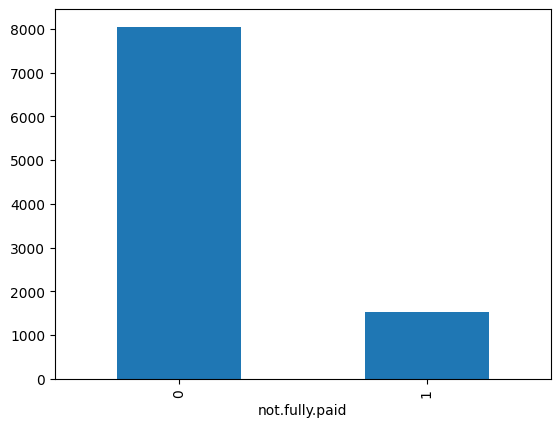

In [116]:
# check imblance in data
print(y.value_counts())

#plot
print("\nPrint plots for imbalance data\n")

import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.show()


In [118]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Sets a seed for reproducibilit

# Set k_neighbors to 1, the minimum possible value
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# now onward X_train/y_train is resampled
X_train = X_train_resampled
y_train = y_train_resampled

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(11274, 13) (11274,)
(2874, 13) (2874,)



Print plots for balanced data



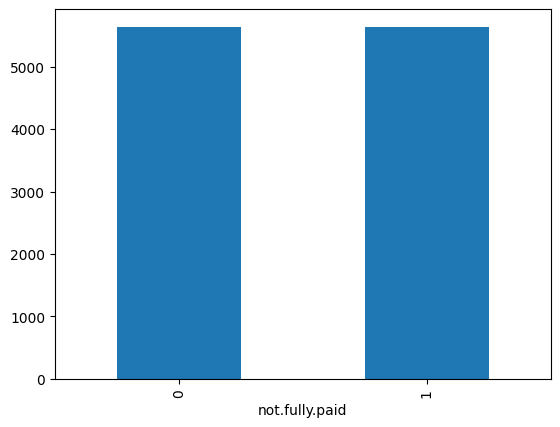

In [119]:
#plot
print("\nPrint plots for balanced data\n")

import matplotlib.pyplot as plt
y_train.value_counts().plot(kind='bar')
plt.show()

In [120]:
# do feature selection using VIF
# --------------------------------
# VIF Technique (Variance Inflation Factor - VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(X):
    vif_data = pd.DataFrame()

    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data


# Progrmatically identify colums to be dropped
def tag_columns_tobeDropped(df):
    mydf = df.copy()

    vif_df = calculate_vif(mydf)
    vif_df["candrop"] = ""
    vif_df["drop_reason"] = "-"

    vif_df = vif_df.sort_values(by='VIF', ascending=False)

    for index, row in vif_df.iterrows():
          if row["VIF"] > 10:
              vif_df.at[index, "candrop"] = "Y"
              vif_df.at[index, "drop_reason"] = "Serious multicollinearity"

          elif row["VIF"] < 6.50:
              vif_df.at[index, "candrop"] = "N"
              vif_df.at[index, "drop_reason"] = "Moderate to high multicollinearity"

          elif row["VIF"] == 1:
              vif_df.at[index, "candrop"] = "Y"
              vif_df.at[index, "drop_reason"] = "Not correlated with other variables"

          else:
              vif_df.at[index, "candrop"] = "N"
              vif_df.at[index, "drop_reason"] = "No need to drop"

    return vif_df

In [121]:
vif_df_indicator = tag_columns_tobeDropped(X_train)
vif_df_indicator


,feature,VIF,candrop,drop_reason
4,log.annual.inc,419.800898,Y,Serious multicollinearity
6,fico,312.794019,Y,Serious multicollinearity
2,int.rate,40.854832,Y,Serious multicollinearity
9,revol.util,6.253695,N,Moderate to high multicollinearity
5,dti,5.893296,N,Moderate to high multicollinearity
7,days.with.cr.line,5.294679,N,Moderate to high multicollinearity
3,installment,4.786963,N,Moderate to high multicollinearity
0,credit.policy,4.690400,N,Moderate to high multicollinearity
1,purpose,2.543249,N,Moderate to high multicollinearity
10,inq.last.6mths,2.109471,N,Moderate to high multicollinearity


In [122]:
high_vif_features   = vif_df_indicator[vif_df_indicator["candrop"] == "Y"]
features_canbetaken = vif_df_indicator[vif_df_indicator["candrop"] == "N"]

high_vif_features = high_vif_features["feature"].tolist()
features_canbetaken = features_canbetaken["feature"].tolist()

features_canbetaken = features_canbetaken + [target]
print(features_canbetaken, "\n\n")

# add additional custom featured avoiding VIF
# features_canbetaken.append('log.annual.inc')
# features_canbetaken.append('revol.util')
# features_canbetaken.append('dti')
# features_canbetaken.append('days.with.cr.line')
# features_canbetaken.append('installment')
# features_canbetaken.append('credit.policy')

# final_features = ['purpose', 'inq.last.6mths', 'revol.bal', 'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'log.annual.inc']
print(features_canbetaken, "\n")

df = ''
df_toTrain = pd.concat([X_train, y_train], axis=1)
df_toTrain.head(2)

# --------------MAIIN DATASET TO FOT FOR MODEL ------------
# print("\nDF to be trained with:-\n")
X = df_toTrain.drop(target, axis=1)
X = X.filter(features_canbetaken, axis=1)
y = y_train # this is after SMOTE (resampled to rmv bias)

df = pd.concat([X, y], axis=1)
df.head(5)

# if this is not equal (training cant me given)
print("Shape X train : X_test :",len(X) == len(X_train))
print("Shape y train : y_test :",len(y) == len(y_train))
# #---------



['revol.util', 'dti', 'days.with.cr.line', 'installment', 'credit.policy', 'purpose', 'inq.last.6mths', 'revol.bal', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'] 


['revol.util', 'dti', 'days.with.cr.line', 'installment', 'credit.policy', 'purpose', 'inq.last.6mths', 'revol.bal', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'] 

Shape X train : X_test : True
Shape y train : y_test : True



Print plots for imbalance data



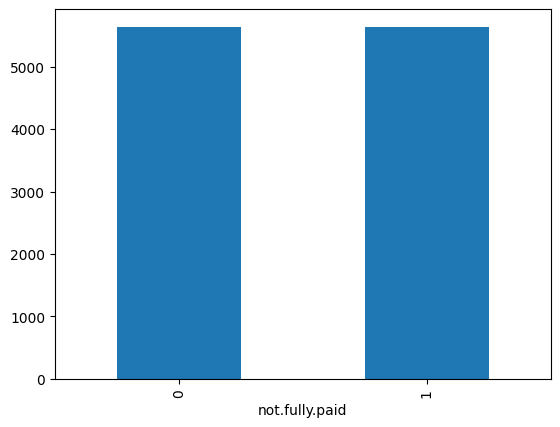

In [123]:
# SOME LR Scheduler
from tensorflow.keras.callbacks import LearningRateScheduler
def exp_decay(epoch, lr):
    return lr * 0.96  # Decay factor
    # lr_scheduler = LearningRateScheduler(exp_decay)

from tensorflow.keras.callbacks import ReduceLROnPlateau
# def ReduceLROnPlateau():
#   lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
#   return lr_reducer

import tensorflow as tf
def cosine_annealing(epoch, lr):
    rate = 0.001 * (1 + tf.math.cos(epoch * 3.14 / 50))  # Adjust 50 as per epochs
    return float(rate)

# plot to see if still bias presence
print("\nPrint plots for imbalance data\n")

import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.show()


In [ ]:
# start creating model to train using Keras + TF
# ---------------------------------------------#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
N, D = X_train.shape

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#-----------------
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.models import Sequential
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    BatchNormalization(),          # Add Batch Normalization for treating data imbalance
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#plot
print("\nPrint plots for imbalance data\n")


# Train with Callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ------------- O P T I MI Z A T IO N ------------------------------------
LEARNING_RATE = 0.010

optimizerAlgo = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE)

# -------- - --- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# 247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7455 - loss: 0.5113
# Train score: [0.5112161636352539, 0.7459130883216858]
# 106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7106 - loss: 0.5660
# Test score: [0.5616983771324158, 0.7088382840156555]

BATCH_SIZE_OLD = 80
def scheduler(epocs, lr):
    # if epocs < 10:
    #     return lr
    # else:
    #     return lr * tf.math.exp(-0.1)

    batch_size_new = 128
    lr_new = lr * (batch_size_new / BATCH_SIZE_OLD) ** 0.5

    return lr_new

# lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
lr_callback = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)



# ------------ C O M P I L E --------------------------------------------
model.compile(optimizer=optimizerAlgo, loss='binary_crossentropy', metrics=['accuracy'])

# fit
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = BATCH_SIZE_OLD, callbacks=[early_stop, lr_callback])
# r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,callbacks=[early_stop])

print("\n\n------------------------------")
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

(7891, 10) (7891,)
(3383, 10) (3383,)

Print plots for imbalance data

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6130 - loss: 0.6480 - val_accuracy: 0.6672 - val_loss: 0.6140 - learning_rate: 0.0020
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6711 - loss: 0.6069 - val_accuracy: 0.6695 - val_loss: 0.6058 - learning_rate: 0.0020
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6741 - loss: 0.6043 - val_accuracy: 0.6772 - val_loss: 0.6016 - learning_rate: 0.0020
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 0.5906 - val_accuracy: 0.6819 - val_loss: 0.5974 - learning_rate: 0.0020
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6824 - loss: 0.5911 - val_accuracy: 0.6754 - val_loss: 0.5986 - learning_rate: 0.0020
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6712 - loss: 0.5984 - val_accuracy: 0.6781 - val_loss: 0.5938 - learning_rate: 0.0020
Epoch 7/100
99/99 ━━━━

In [125]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))



7891 7891
3383 3383


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7455 - loss: 0.5113

Traing Result : [0.5112161636352539, 0.7459130883216858]
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7106 - loss: 0.5660

Test Result : [0.5616983771324158, 0.7088382840156555]

---------------------------------



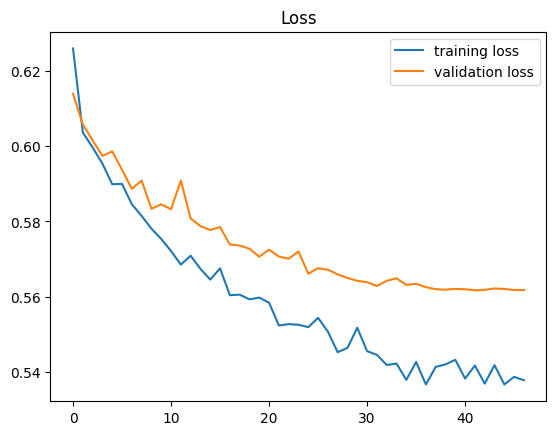

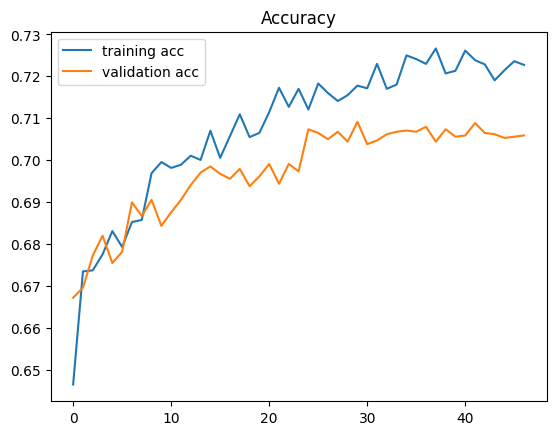

In [129]:
print("\nTraing Result :", model.evaluate(X_train, y_train))
print("\nTest Result :",   model.evaluate(X_test, y_test))
print("\n---------------------------------\n")

plt.title('Loss')
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.plot(r.history['accuracy'], label='training acc')
plt.plot(r.history['val_accuracy'], label='validation acc')
plt.legend()
plt.show()



In [130]:
dfToTest = pd.concat([X, y], axis=1)
# get target with 0
upPaidData = dfToTest[dfToTest[target] == 0]
upPaidData.head(10)


,revol.util,dti,days.with.cr.line,installment,credit.policy,purpose,inq.last.6mths,revol.bal,delinq.2yrs,pub.rec,not.fully.paid
0,1.7,17.26,5880.000000,516.89,1,4,0,256,0,1,0
2,31.4,12.80,8130.000000,134.86,1,3,3,6793,2,0,0
3,27.8,15.00,9720.041667,860.34,1,2,0,6759,3,0,0
4,1.8,0.60,4469.958333,119.94,1,0,2,90,0,0,0
5,94.6,13.97,4139.958333,470.65,0,1,4,17219,0,0,0
6,25.2,7.68,2460.000000,261.71,1,0,0,13161,0,0,0
7,30.7,20.23,4619.958333,126.78,1,1,0,4508,0,0,0
8,84.9,7.12,4410.000000,223.63,1,2,0,21477,0,0,0
9,14.1,13.24,5851.000000,136.55,0,5,5,577,2,1,0
10,3.2,1.46,5490.000000,56.20,1,0,4,2701,0,0,0


In [131]:
print("---")

paidData = dfToTest[dfToTest[target] == 1]
paidData.head(10)


---


,revol.util,dti,days.with.cr.line,installment,credit.policy,purpose,inq.last.6mths,revol.bal,delinq.2yrs,pub.rec,not.fully.paid
1,50.7,5.46,1260.000000,246.33,0,2,7,4310,0,0,1
25,8.7,2.88,4320.000000,282.63,1,0,3,1076,0,0,1
30,46.1,7.47,3600.000000,489.61,0,1,2,168496,1,0,1
33,79.6,19.87,7920.000000,746.24,1,2,1,90063,0,0,1
41,65.4,23.34,2039.958333,81.05,0,3,9,6020,0,1,1
43,91.2,8.70,5279.958333,235.44,0,2,4,16690,0,0,1
55,10.5,0.82,7499.958333,656.07,1,2,1,4363,0,0,1
59,92.9,25.93,6915.000000,203.76,0,0,0,39481,0,0,1
62,68.2,8.67,3239.958333,166.50,1,0,0,11797,0,0,1
78,26.9,4.46,1769.958333,277.16,1,5,0,5626,0,0,1


In [132]:
# do binary prediction
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)
# y_pred = y_pred.flatten()
# print(y_pred)

testData =  [
    [50.7, 	5.46, 	1260.000000, 	246.33, 	0, 	2, 	7, 	4310, 	0, 	0], # 1
    [92.9, 	25.93, 	6915.000000, 	203.76, 	0, 	0, 	0, 	39481, 	0, 	0], # 1

    [27.8, 	15.00, 	9720.041667, 	860.34, 	1, 	2, 	0, 	6759, 	3, 	0], # 0
    [84.9, 	7.12, 	4410.000000, 	223.63, 	1, 	2, 	0, 	21477, 	0, 	0], # 0

    [26.9, 	4.46, 	1769.958333, 	277.16, 	1, 	5, 	0, 	5626, 	0, 	0], # 1
  ]

# do test
testData = scaler.transform(testData)
y_pred = model.predict(testData)
y_pred = (y_pred > 0.5).astype(int)
# y_pred = y_pred.flatten()
print(y_pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
[[1]
 [1]
 [0]
 [0]
 [0]]


In [133]:
print(df_toTrain.columns)
print("\n")

import warnings
warnings.simplefilter("ignore", UserWarning)

testData = scaler.transform(testData) # Now testData is a 2D array

import warnings
warnings.simplefilter("ignore", UserWarning)

df = ''
falsePredictionCount = 0
testCount = 100
# loop dataframe to predict
for index, row in dfToTest.head(testCount).iterrows():

    # Select only the features the scaler was trained on
    testData = dfToTest.iloc[[index]][features_canbetaken[:-1]].values.tolist()  # Get the current row as a 2D list using .iloc[[index]]
    testData = scaler.transform(testData) # Now testData is a 2D array

    y_pred = model.predict(testData)
    y_pred = (y_pred > 0.5).astype(int)

    # prdVal = int(y_pred[0])
    prdVal = int(y_pred[0].item())

    originalVal = int(row['not.fully.paid'])
    predStat = prdVal == originalVal

    if not predStat:
      falsePredictionCount += 1

    print("Prtedicted As :" + str(prdVal) + " | Original Value :" + str(originalVal) + " | Is Correct :" + str(predStat))

print("\n\n\nFalse prediction :", str(falsePredictionCount) +" out of :" + str(testCount))

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Prtedicted As :0 | Original Value :0 | Is Correct :True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prtedicted As :1 | Original Value :1 | Is Correct :True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prtedicted As :0 | Original Value :0 | Is Correct :True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prtedicted As :0 | Original Value :0 | Is Correct :True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prtedicted As :0 | Original Value :0 | Is Correct :True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prtedicted As :1 | Original Value :0 | Is Correct :False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prtedicted As :0 | Original Value :0 | Is Correct :True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prtedicted As :0 | Original Value :0 | Is Correct :True
1/

In [134]:
# Model Summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_6                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,533 (33.34 KB)

 Trainable params: 2,837 (11.08 KB)

 Non-trainable params: 20 (80.00 B)

 Optimizer params: 5,676 (22.18 KB)

In [135]:
# save the keras model
model.save('loan_model_keras_v1.0.keras')

#doanload the model in local disk
from google.colab import files
files.download('loan_model_keras_v1.0.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
# show the feature names
num_features = model.input_shape[1]  # Assuming a Dense model
print(f"Number of input features: {num_features}")
print("\n\n")
print(features_canbetaken)

Number of input features: 10



['revol.util', 'dti', 'days.with.cr.line', 'installment', 'credit.policy', 'purpose', 'inq.last.6mths', 'revol.bal', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


In [137]:
import warnings
warnings.simplefilter("ignore", UserWarning)

model = ''

# print(features_canbetaken)
# ft = ['purpose', 'inq.last.6mths', 'revol.bal', 'delinq.2yrs', 'pub.rec', 'log.annual.inc']

ft = features_canbetaken
print("Feature to use in sequence: ", ft)

# load the model
from tensorflow.keras.models import load_model
model = load_model('loan_model_keras_v1.0.keras')

# predict Live
# ['purpose', 'inq.last.6mths', 'revol.bal', 'delinq.2yrs', 'pub.rec', 'log.annual.inc']
sampleTestData =  [
     [1.7,	17.26,	5880.000000,	516.89,	1,	4,	0,	256,	  0,	1] # 0 actual prediction
    ,[46.1,	7.47,	  3600.000000,  489.61,	0,	1,	2,	168496,	1,	0] # 1
   ,[30.7,  20.23,	4619.958333,	126.78,	1,	1,	0,	4508,	  0,	0] # 0
   ,[26.9,	4.46,	  1769.958333,	277.16,	1,	5,	0,	5626,	  0,	0] # 1
  ]

# do test
testData = scaler.transform(sampleTestData)
y_pred = model.predict(testData)
y_pred = (y_pred > 0.5).astype(int)

print(y_pred)

## Possibly getting 1 error in prediction on this test (Need more tune for accuracy)

Feature to use in sequence:  ['revol.util', 'dti', 'days.with.cr.line', 'installment', 'credit.policy', 'purpose', 'inq.last.6mths', 'revol.bal', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
[[0]
 [1]
 [0]
 [0]]
